In [1]:
'''
Cell #1:
This is the cell where you import all of the Python packages needed for these activities
Actions: hit the 'Run' button
'''
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


from impedance import preprocessing

pi = (math. pi)
e = (math.e )
%matplotlib notebook
from pylab import rcParams

rcParams['figure.figsize'] =10,8

def define_figure(xlabel="X", ylabel="Y"):
    fig = plt.figure(figsize=(10,10), dpi= 80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
    ax.set_xlabel(xlabel,size=20)
    ax.set_ylabel(ylabel,size=20)
    plt.tick_params(axis='both',labelsize=20)
    return ax


In [4]:
'''
Cell #2:
This is where you will import all of the raw EIS data needed for these activities
Actions: Hit the run button
'''


#Load data from the example EIS data
freq1, Zdata1 = preprocessing.readGamry('JChemEd_EIS_data/Activity3.3_EISPOT_soda_1200mVvsNa-metal.DTA')
freq2, Zdata2 = preprocessing.readGamry('JChemEd_EIS_data/Activity3.3_EISPOT_soda_100mVvsNa-metal.DTA')




# Keep only the impedance data in the first quadrant
freq1, Zdata1 = preprocessing.ignoreBelowX(freq1, Zdata1)
freq2, Zdata2 = preprocessing.ignoreBelowX(freq2, Zdata2)


In [5]:
'''
Cell #3:
This is where you will construct different equivalent circuit models
Actions: Hit the 'Run' button, you will be switching out different circuits during for subsequent cells
'''
from impedance.models.circuits import CustomCircuit

circuit1 = 'R0-p(R1,C1)-p(R2-CPE1,CPE2)'
initial_guess1 = [18, 37,2.7e-5,70,0.004, .6, 7.1e-5, 0.6]

circuit1 = CustomCircuit(circuit1, initial_guess=initial_guess1)

circuit2 = 'R0-p(R1,C1)-p(R2-CPE2,CPE2)'
initial_guess2 = [20, 121,1.0e-7,170,0.017, .7, 3.8e-5,0.66]

circuit2 = CustomCircuit(circuit2, initial_guess=initial_guess2)

print(circuit1, circuit2)


Circuit string: R0-p(R1,C1)-p(R2-CPE1,CPE2)
Fit: False

Initial guesses:
     R0 = 1.80e+01 [Ohm]
     R1 = 3.70e+01 [Ohm]
     C1 = 2.70e-05 [F]
     R2 = 7.00e+01 [Ohm]
  CPE1_0 = 4.00e-03 [Ohm^-1 sec^a]
  CPE1_1 = 6.00e-01 []
  CPE2_0 = 7.10e-05 [Ohm^-1 sec^a]
  CPE2_1 = 6.00e-01 []
 
Circuit string: R0-p(R1,C1)-p(R2-CPE2,CPE2)
Fit: False

Initial guesses:
     R0 = 2.00e+01 [Ohm]
     R1 = 1.21e+02 [Ohm]
     C1 = 1.00e-07 [F]
     R2 = 1.70e+02 [Ohm]
  CPE2_0 = 1.70e-02 [Ohm^-1 sec^a]
  CPE2_1 = 7.00e-01 []
  CPE2_0 = 3.80e-05 [Ohm^-1 sec^a]
  CPE2_1 = 6.60e-01 []



In [6]:
'''
Cell #4: 
This is the cell where can access the fit parameters from the respective ECMs.
Action: Hit the 'Run' button 
'''

circuit1.fit(freq1, Zdata1)
circuit2.fit(freq2, Zdata2)


print(circuit1,circuit2)


Circuit string: R0-p(R1,C1)-p(R2-CPE1,CPE2)
Fit: True

Initial guesses:
     R0 = 1.80e+01 [Ohm]
     R1 = 3.70e+01 [Ohm]
     C1 = 2.70e-05 [F]
     R2 = 7.00e+01 [Ohm]
  CPE1_0 = 4.00e-03 [Ohm^-1 sec^a]
  CPE1_1 = 6.00e-01 []
  CPE2_0 = 7.10e-05 [Ohm^-1 sec^a]
  CPE2_1 = 6.00e-01 []

Fit parameters:
     R0 = 1.85e+01  (+/- 3.48e-01) [Ohm]
     R1 = 3.55e+01  (+/- 1.45e+00) [Ohm]
     C1 = 2.87e-05  (+/- 1.39e-06) [F]
     R2 = 7.37e+01  (+/- 2.00e+00) [Ohm]
  CPE1_0 = 4.33e-03  (+/- 7.81e-06) [Ohm^-1 sec^a]
  CPE1_1 = 5.95e-01  (+/- 1.39e-03) []
  CPE2_0 = 7.62e-05  (+/- 7.18e-06) [Ohm^-1 sec^a]
  CPE2_1 = 6.18e-01  (+/- 1.06e-02) []
 
Circuit string: R0-p(R1,C1)-p(R2-CPE2,CPE2)
Fit: True

Initial guesses:
     R0 = 2.00e+01 [Ohm]
     R1 = 1.21e+02 [Ohm]
     C1 = 1.00e-07 [F]
     R2 = 1.70e+02 [Ohm]
  CPE2_0 = 1.70e-02 [Ohm^-1 sec^a]
  CPE2_1 = 7.00e-01 []
  CPE2_0 = 3.80e-05 [Ohm^-1 sec^a]
  CPE2_1 = 6.60e-01 []

Fit parameters:
     R0 = 2.43e+01  (+/- 3.28e-01) [Ohm]
     R1 

In [7]:
'''
Cell #5: 
This is the cell where you fully simulate the impedance data using your ECMs.
Actions: Hit the 'Run' button
'''
Zfit1=circuit1.predict(freq1)
Zfit2=circuit2.predict(freq2)


<IPython.core.display.Javascript object>


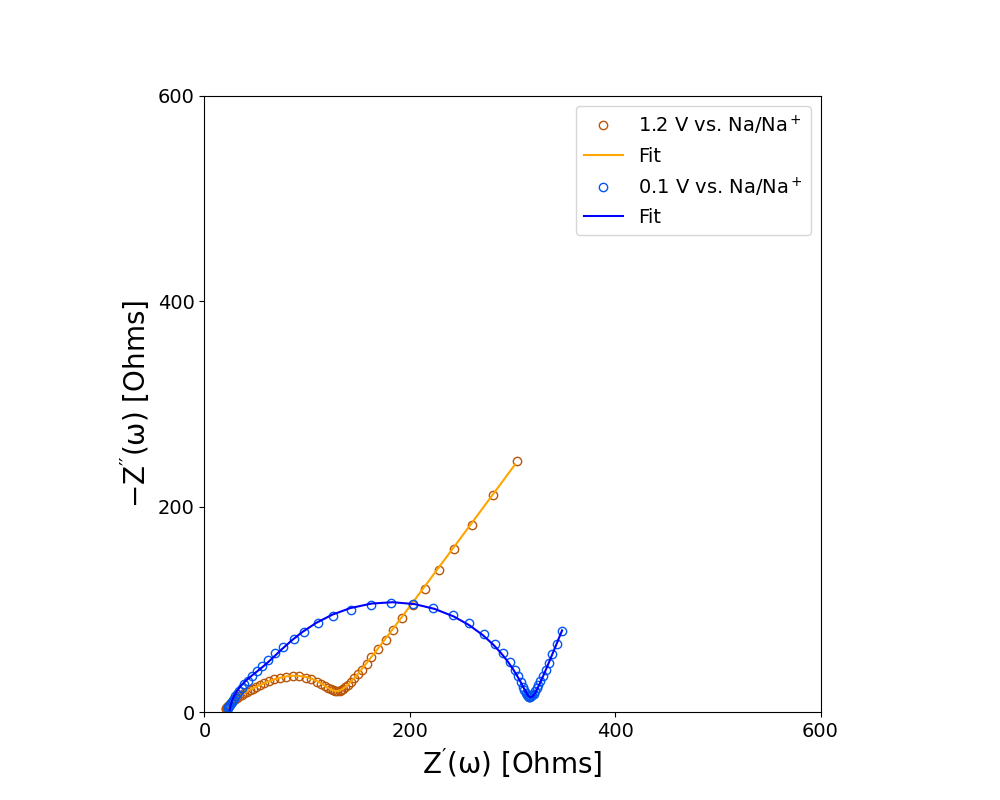

In [10]:
'''
Cell #6:
This is the cell where you plot both the experimental EIS data and the fitting result from ECM_1.
Action: Hit the 'Run' button.
'''
from impedance.visualization import plot_nyquist


fig, ax = plt.subplots()
plot_nyquist(Zdata1,fmt='o', ax=ax,color='#BA5508', markerfacecolor='None')
plot_nyquist(Zfit1, fmt='-',ax=ax, color='orange')


plot_nyquist(Zdata2,fmt='o', ax=ax,color='#0356F0',markerfacecolor='None')
plot_nyquist(Zfit2, fmt='-',ax=ax, color='b')


plt.grid(False)
plt.xlim(0,600)
plt.ylim(0,600)
plt.legend(['1.2 V vs. Na/Na$^+$', 'Fit','0.1 V vs. Na/Na$^+$','Fit'])
plt.show()
plt.rcParams["font.family"] = "Calibri"
#plt.savefig('/Users/danielwindsordan/Desktop/Data/rawfigs/DSW_01_190_slurry1spectra2_EIS_JChemEd_fit2.png', dpi=300)

In [9]:
'''
Cell
'''
# Sample experimental and simulated EIS data
experimental_data1 = np.array([Zdata1], dtype=float)  # Replace [...] with your experimental data
simulated_data1 = np.array([Zfit1], dtype=float)     # Replace [...] with your simulated data

experimental_data2 = np.array([Zdata2], dtype=float)  # Replace [...] with your experimental data
simulated_data2= np.array([Zfit2], dtype=float)     # Replace [...] with your simulated data


# Ensure both arrays are of the same shape and type
if experimental_data1.shape != simulated_data1.shape:
    raise ValueError("Experimental and simulated data must have the same shape.")
    
if experimental_data2.shape != simulated_data2.shape:
    raise ValueError("Experimental and simulated data must have the same shape.")
    

# Calculate chi-squared
chi_squared1 = np.sum(((experimental_data1 - simulated_data1) ** 2) / simulated_data1)
chi_squared2 = np.sum(((experimental_data2 - simulated_data2) ** 2) / simulated_data2)


print("Chi-squared value:", chi_squared1, chi_squared2)

Chi-squared value: 0.09083074635748226 1.2685298495023432


<ipython-input-9-1f37b96a325f>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  experimental_data1 = np.array([Zdata1], dtype=float)  # Replace [...] with your experimental data
<ipython-input-9-1f37b96a325f>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  simulated_data1 = np.array([Zfit1], dtype=float)     # Replace [...] with your simulated data
<ipython-input-9-1f37b96a325f>:8: ComplexWarning: Casting complex values to real discards the imaginary part
  experimental_data2 = np.array([Zdata2], dtype=float)  # Replace [...] with your experimental data
<ipython-input-9-1f37b96a325f>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  simulated_data2= np.array([Zfit2], dtype=float)     # Replace [...] with your simulated data
